In [57]:
import numpy as np 
import pandas as pd 
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')
pd.set_option('display.max_columns',50)

In [58]:
#Reading ufc stats

In [59]:
df=pd.read_csv('/kaggle/input/ufc-fighters-statistics/ufc-fighters-statistics.csv')

In [60]:
#inspecting the data

In [61]:
df.dtypes

name                                             object
nickname                                         object
wins                                              int64
losses                                            int64
draws                                             int64
height_cm                                       float64
weight_in_kg                                    float64
reach_in_cm                                     float64
stance                                           object
date_of_birth                                    object
significant_strikes_landed_per_minute           float64
significant_striking_accuracy                   float64
significant_strikes_absorbed_per_minute         float64
significant_strike_defence                      float64
average_takedowns_landed_per_15_minutes         float64
takedown_accuracy                               float64
takedown_defense                                float64
average_submissions_attempted_per_15_minutes    

In [62]:
df.describe()

,wins,losses,draws,height_cm,weight_in_kg,reach_in_cm,significant_strikes_landed_per_minute,significant_striking_accuracy,significant_strikes_absorbed_per_minute,significant_strike_defence,average_takedowns_landed_per_15_minutes,takedown_accuracy,takedown_defense,average_submissions_attempted_per_15_minutes
count,4111.000000,4111.000000,4111.000000,3813.000000,4024.000000,2184.000000,4111.000000,4111.000000,4111.000000,4111.000000,4111.000000,4111.000000,4111.000000,4111.000000
mean,12.366821,5.726344,0.264413,178.234325,77.395825,181.808874,2.437516,35.542447,3.145206,42.643639,1.250586,26.299927,38.958891,0.610095
std,9.374667,5.103768,0.822373,8.888050,17.982242,10.680804,1.990903,20.398502,2.848502,22.322427,1.935716,28.700980,34.426458,1.505924
min,0.000000,0.000000,0.000000,152.400000,47.630000,147.320000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,2.000000,0.000000,172.720000,65.770000,175.260000,0.830000,27.000000,1.550000,36.000000,0.000000,0.000000,0.000000,0.000000
50%,11.000000,5.000000,0.000000,177.800000,77.110000,182.880000,2.330000,40.000000,2.940000,50.000000,0.590000,22.000000,42.000000,0.000000
75%,17.000000,8.000000,0.000000,185.420000,83.910000,190.500000,3.600000,49.000000,4.230000,58.000000,1.940000,45.000000,66.000000,0.700000
max,253.000000,83.000000,11.000000,226.060000,349.270000,213.360000,17.650000,100.000000,52.500000,100.000000,32.140000,100.000000,100.000000,21.900000


In [63]:
df.columns


Index(['name', 'nickname', 'wins', 'losses', 'draws', 'height_cm',
       'weight_in_kg', 'reach_in_cm', 'stance', 'date_of_birth',
       'significant_strikes_landed_per_minute',
       'significant_striking_accuracy',
       'significant_strikes_absorbed_per_minute', 'significant_strike_defence',
       'average_takedowns_landed_per_15_minutes', 'takedown_accuracy',
       'takedown_defense', 'average_submissions_attempted_per_15_minutes'],
      dtype='object')

In [64]:
df=df[['name','wins', 'losses', 'draws', 'height_cm',
       'weight_in_kg','stance','reach_in_cm',
       'significant_strikes_landed_per_minute',
       'significant_striking_accuracy',
       'significant_strikes_absorbed_per_minute', 'significant_strike_defence',
       'average_takedowns_landed_per_15_minutes', 'takedown_accuracy',
       'takedown_defense', 'average_submissions_attempted_per_15_minutes']].copy()

In [65]:
df.shape

(4111, 16)

In [66]:
df.isna().sum()

name                                               0
wins                                               0
losses                                             0
draws                                              0
height_cm                                        298
weight_in_kg                                      87
stance                                           823
reach_in_cm                                     1927
significant_strikes_landed_per_minute              0
significant_striking_accuracy                      0
significant_strikes_absorbed_per_minute            0
significant_strike_defence                         0
average_takedowns_landed_per_15_minutes            0
takedown_accuracy                                  0
takedown_defense                                   0
average_submissions_attempted_per_15_minutes       0
dtype: int64

In [67]:
df.head(5)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,name,wins,losses,draws,height_cm,weight_in_kg,stance,reach_in_cm,significant_strikes_landed_per_minute,significant_striking_accuracy,significant_strikes_absorbed_per_minute,significant_strike_defence,average_takedowns_landed_per_15_minutes,takedown_accuracy,takedown_defense,average_submissions_attempted_per_15_minutes
0,Robert Drysdale,7,0,0,190.50,92.99,Orthodox,NaN,0.00,0.0,0.00,0.0,7.32,100.0,0.0,21.9
1,Daniel McWilliams,15,37,0,185.42,83.91,NaN,NaN,3.36,77.0,0.00,0.0,0.00,0.0,100.0,21.6
2,Dan Molina,13,9,0,177.80,97.98,NaN,NaN,0.00,0.0,5.58,60.0,0.00,0.0,0.0,20.9
3,Paul Ruiz,7,4,0,167.64,61.23,NaN,NaN,1.40,33.0,1.40,75.0,0.00,0.0,100.0,20.9
4,Collin Huckbody,8,2,0,190.50,83.91,Orthodox,193.04,2.05,60.0,2.73,42.0,10.23,100.0,0.0,20.4


In [68]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4106    False
4107    False
4108    False
4109    False
4110    False
Length: 4111, dtype: bool

In [69]:
#correlation

In [70]:
df_corr=df[['wins', 'losses', 'draws', 'height_cm','weight_in_kg','reach_in_cm']].dropna().corr()

In [71]:
#Analyze the relationship between fighters' physical attributes (height, weight, reach) and their fighting performance.

<Axes: >

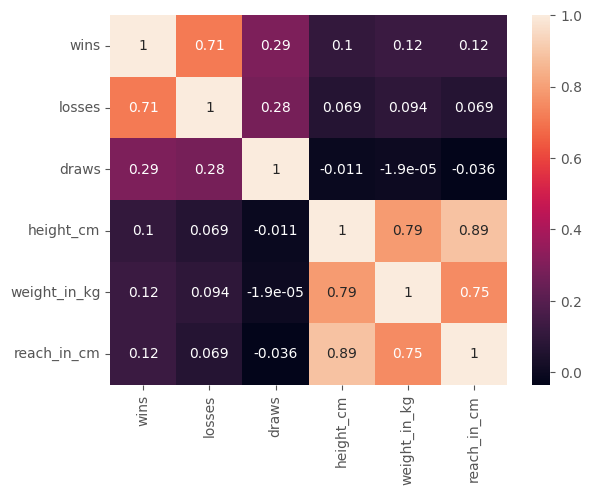

In [72]:
sns.heatmap(df_corr,annot=True)

In [73]:
df['weight_in_kg'] = df['weight_in_kg'].fillna(df['weight_in_kg'].median())
def assign_weight_category(weight):
    if weight <= 56.7:
        return 'Flyweight'
    elif weight <= 61.2:
        return 'Bantamweight'
    elif weight <= 65.8:
        return 'Featherweight'
    elif weight <= 70.3:
        return 'Lightweight'
    elif weight <= 77.1:
        return 'Welterweight'
    elif weight <= 83.9:
        return 'Middleweight'
    elif weight <= 93.0:
        return 'Light Heavyweight'
    elif weight <= 120.2:
        return 'Heavyweight'
    else:
        return 'Super Heavyweight' 
df['weight_category'] = df['weight_in_kg'].apply(assign_weight_category)


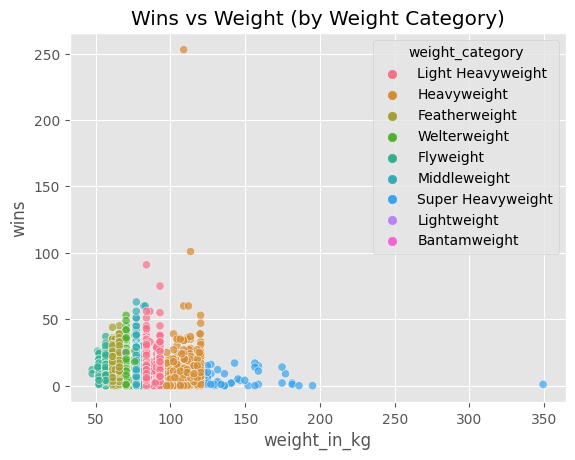

In [74]:
sns.scatterplot(data=df, x='weight_in_kg', y='wins', hue='weight_category', alpha=0.7)
plt.title("Wins vs Weight (by Weight Category)")
plt.show()

In [75]:
#Determine which stances are more effective and analyze the impact of striking accuracy on fight outcomes.

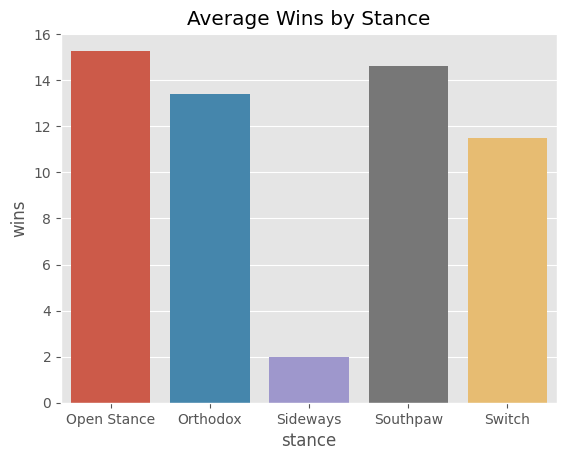

In [76]:
stance_performance = df.groupby('stance')['wins'].mean().reset_index()
sns.barplot(x='stance', y='wins', data=stance_performance)
plt.title('Average Wins by Stance')
plt.show()

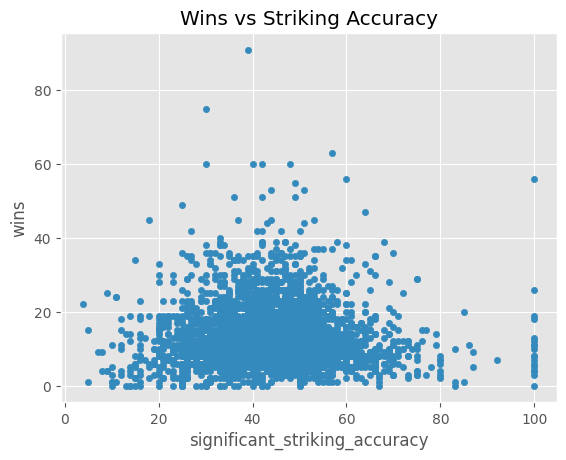

In [77]:
df = df.loc[(df['significant_striking_accuracy'] > 0)]
df.plot(kind='scatter', y='wins', x='significant_striking_accuracy', title='Wins vs Striking Accuracy')
plt.show()


In [78]:
#Investigate the correlation between takedown accuracy and the ability to defend against takedowns.

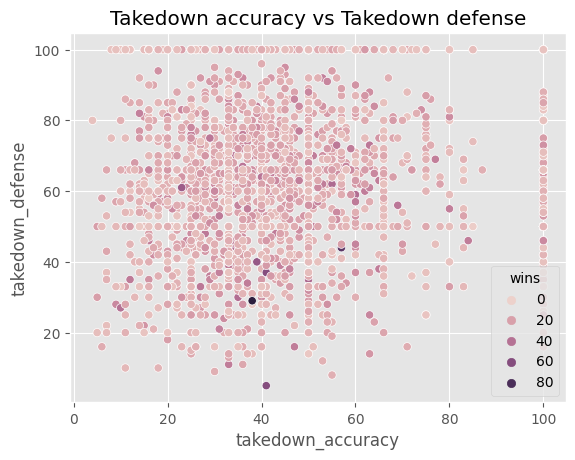

In [79]:
df = df.loc[(df['takedown_accuracy'] > 0) & (df['takedown_defense'] > 0)]
sns.scatterplot(x='takedown_accuracy',y='takedown_defense',hue='wins',data=df)
plt.title('Takedown accuracy vs Takedown defense')
plt.show()

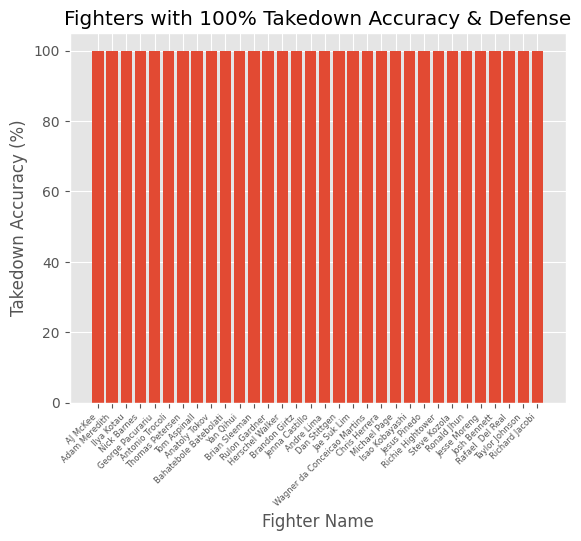

In [80]:
outliers = df.loc[(df['takedown_accuracy'] == 100) & (df['takedown_defense'] == 100)]
plt.bar(outliers['name'], outliers['takedown_accuracy'])
plt.xlabel('Fighter Name')
plt.ylabel('Takedown Accuracy (%)')
plt.title('Fighters with 100% Takedown Accuracy & Defense')
plt.xticks(rotation=45, ha='right',fontsize=6)
plt.show()

In [81]:
#Analyze striking accuracy and defense to identify fighters with the best stand-up game.

/tmp/ipykernel_36/373818445.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'stand_up_score'] = (


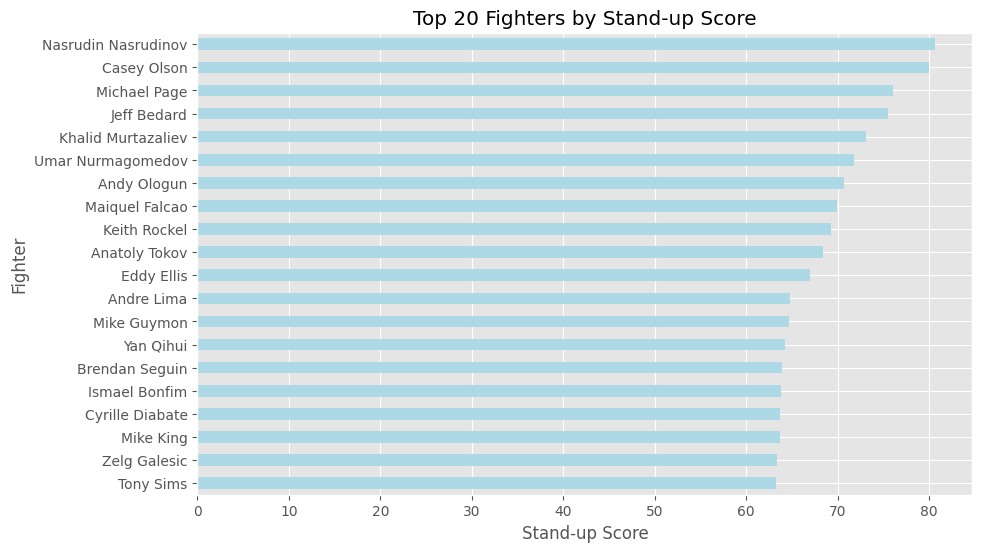

In [82]:
df.loc[:, 'stand_up_score'] = (
    (df['significant_striking_accuracy'] + df['significant_strike_defence']) / 2
    - df['significant_strikes_absorbed_per_minute']
)
df = df.dropna(subset=['stand_up_score'])
df = df[df['stand_up_score'] > 0]
top_fighters = df.nlargest(20, 'stand_up_score').sort_values('stand_up_score', ascending=True)
top_fighters.plot(kind='barh', x='name', y='stand_up_score', figsize=(10,6), legend=False,color='lightblue')
plt.title("Top 20 Fighters by Stand-up Score")
plt.xlabel("Stand-up Score")
plt.ylabel("Fighter")
plt.show()


In [83]:
#Identify fighters with high submission attempt rates and explore their success in executing submissions.

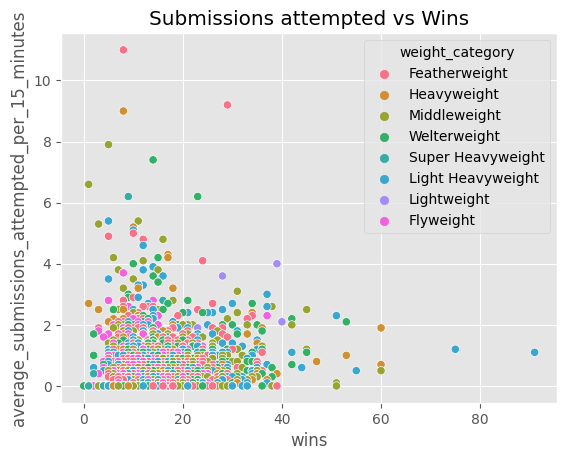

In [84]:
sns.scatterplot(x='wins',y='average_submissions_attempted_per_15_minutes',hue='weight_category',data=df)
plt.title('Submissions attempted vs Wins')
plt.show()